# Weather Analysis Numpy 

This is a learner use case challenge presented by LinkeDIn Learning. The data in this use case are from www.ncdc.noaa.gov. The goal of the exercise is to plot the temperature anomaly for NEW YORK station from 1880-2020. The average temperature for each year is compared with the average temperature throughout the mid century: 1945-1955. 

In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

import getweather

%matplotlib inline

The weather data for the station at New York is downloaded from https://www.ncdc.noaa.gov 

In [2]:
# get data from all years for NEW YORK station

allyears = np.vstack([getweather.getyear('NEW YORK', ['TMIN','TMAX'], year) 
                      for year in range(1880, 2020)])

# compute (TMIN + TMAX)/2, averaged over all days in every year

allavg = np.nanmean(0.5 * (allyears['TMIN'] + allyears['TMAX']), axis=1)

In [3]:
# calculate mid century average, the average temperature for the period 1945-1955.

mid_temp = np.vstack([getweather.getyear('NEW YORK', ['TMIN','TMAX'], year) 
                      for year in range(1945, 1956)])
mid_avg = np.nanmean(0.5 * (mid_temp['TMIN']+mid_temp['TMAX']))
mid_avg

12.832789539227898

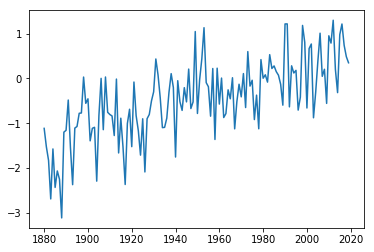

In [7]:
# Plot the graph of anomaly

pp.plot(np.arange(1880,2020), allavg - mid_avg)

The graph is noisy, so we will smooth the data with uniform mask of length 10. In the function of np.correlate,(mode = "valid") drops boundary values that cannot be fully correlated. 

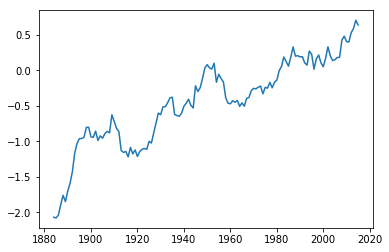

In [10]:
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

pp.plot(np.arange(1880,2020)[4:-4], smooth(allavg - mid_avg, 9, 'valid'))